<a href="https://colab.research.google.com/github/marianotorresleyva/challenge2-data-science-latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data_json = response.json()
df = pd.json_normalize(data_json)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [43]:
columns = [col.split('.')[-1].capitalize() for col in df.columns]
print(columns)
df.columns = columns

['Customerid', 'Churn', 'Gender', 'Seniorcitizen', 'Partner', 'Dependents', 'Tenure', 'Phoneservice', 'Multiplelines', 'Internetservice', 'Onlinesecurity', 'Onlinebackup', 'Deviceprotection', 'Techsupport', 'Streamingtv', 'Streamingmovies', 'Contract', 'Paperlessbilling', 'Paymentmethod', 'Monthly', 'Total', 'Churnnum', 'Cuentasdiarias']


In [7]:
#Evaluacion de valores unicos en las columnas Contract y Paymentmethod
print(df['Contract'].unique())
print(df['Paymentmethod'].unique())
print(df['Internetservice'].unique())

['One year' 'Month-to-month' 'Two year']
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
['DSL' 'Fiber optic' 'No']


In [47]:
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')
df.dropna(subset=['Total'], inplace=True)

df['ChurnNum'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

print(f"Datos cargados correctamente: {df.shape[0]} filas, {df.shape[1]} columnas.")

Datos cargados correctamente: 7256 filas, 25 columnas.


In [26]:
df.info()
df.sample(20)

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7256 non-null   object 
 1   Churn             7256 non-null   object 
 2   gender            7256 non-null   object 
 3   SeniorCitizen     7256 non-null   int64  
 4   Partner           7256 non-null   object 
 5   Dependents        7256 non-null   object 
 6   tenure            7256 non-null   int64  
 7   PhoneService      7256 non-null   object 
 8   MultipleLines     7256 non-null   object 
 9   InternetService   7256 non-null   object 
 10  OnlineSecurity    7256 non-null   object 
 11  OnlineBackup      7256 non-null   object 
 12  DeviceProtection  7256 non-null   object 
 13  TechSupport       7256 non-null   object 
 14  StreamingTV       7256 non-null   object 
 15  StreamingMovies   7256 non-null   object 
 16  Contract          7256 non-null   object 
 17  

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
6299,8661-BOYNW,No,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),84.40,6096.45
6213,8544-GOQSH,No,Female,0,No,No,14,Yes,No,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),80.05,1112.30
4150,5692-FPTAH,Yes,Female,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.40,45.40
1146,1625-JAIIY,Yes,Female,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,One year,Yes,Electronic check,83.00,5685.80
4379,5998-DZLYR,No,Female,0,Yes,No,61,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),94.35,5703.00
5887,8048-DSDFQ,No,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20
6945,9565-JSNFM,Yes,Male,0,No,No,38,Yes,No,Fiber optic,No,No,No,No,No,No,One year,Yes,Bank transfer (automatic),70.45,2597.60
114,0195-IESCP,Yes,Male,0,Yes,No,10,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.25,855.30
6127,8387-MOJJT,Yes,Female,0,Yes,Yes,42,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),77.95,3384.00
3671,5057-RKGLH,No,Female,0,Yes,Yes,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.35,191.10


In [ ]:
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 10})

#🔧 Transformación

In [44]:
N_dias_aprox = 30
df['CuentasDiarias'] = df['Monthly'] / N_dias_aprox
df['CuentasDiarias'] = df['CuentasDiarias'].round(2)

#📊 Carga y análisis

In [10]:
df.describe()

,Tenure,Monthly,Total,CuentasDiarias
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157292
std,24.571773,30.129572,2268.648587,1.004407
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.425000,396.200000,1.180000
50%,29.000000,70.300000,1389.200000,2.340000
75%,55.000000,89.875000,3778.525000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


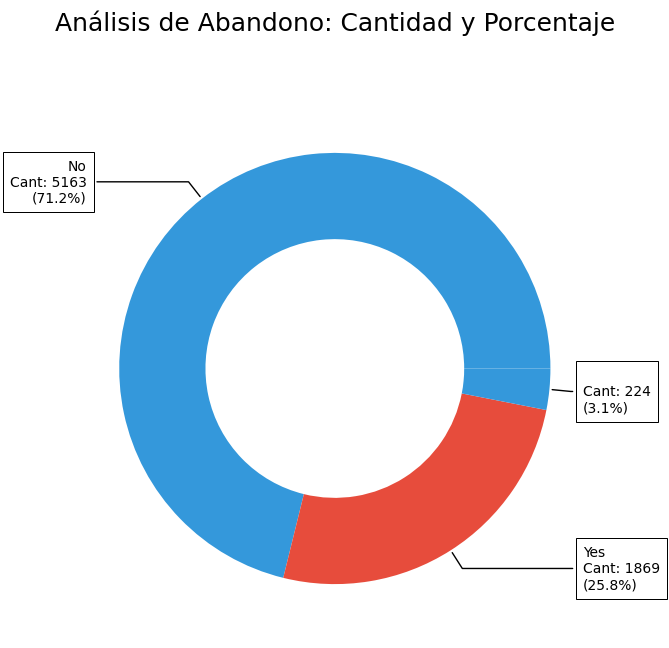

In [45]:
# 1. Preparar los datos
counts = df['Churn'].value_counts()
labels = counts.index
values = counts.values
total = sum(values)

# 2. Configuración estética
colores = ['#3498db', '#e74c3c'] # Azul (No), Rojo (Yes)

fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))

# 3. Crear el gráfico de dona (usando wedgeprops para el hueco)
wedges, texts = ax.pie(values, wedgeprops=dict(width=0.4), startangle=0, colors=colores)

# 4. Configurar las líneas y etiquetas externas
bbox_props = dict(boxstyle="square,pad=0.5", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    # Calcular el ángulo de la rebanada
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    # Definir la dirección de la señalización (fuera del círculo)
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    # Formatear el texto: Cantidad Real y Porcentaje
    percentage = (values[i] / total) * 100
    texto_etiqueta = f"{labels[i]}\nCant: {values[i]}\n({percentage:.1f}%)"

    # Dibujar la anotación
    ax.annotate(texto_etiqueta, xy=(x, y), xytext=(1.15*np.sign(x), 1.1*y),
                horizontalalignment=horizontalalignment, **kw, fontsize=10)

plt.title("Análisis de Abandono: Cantidad y Porcentaje", fontsize=18, pad=50)
plt.show()

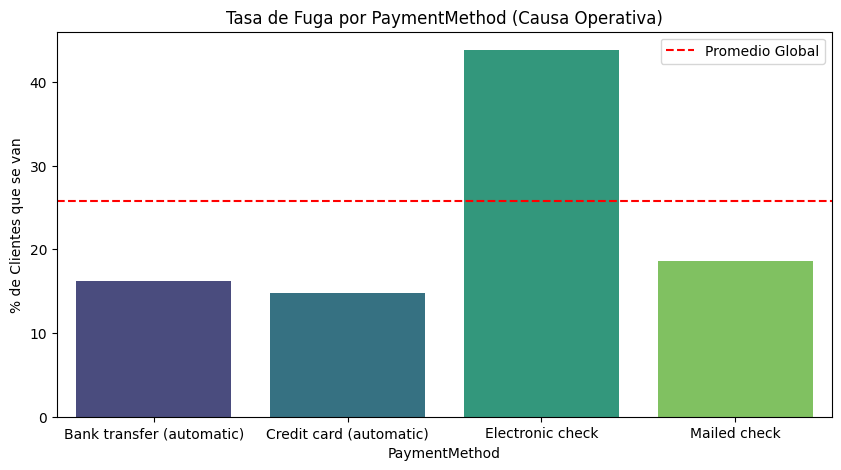

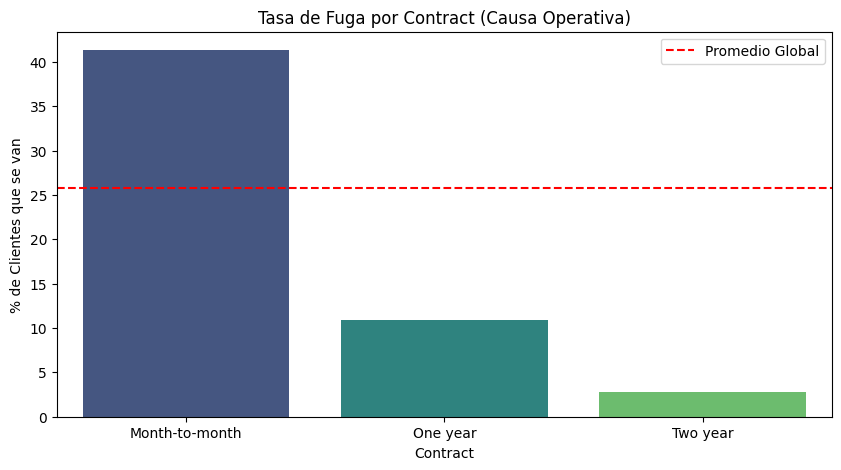

In [37]:
def plot_churn_rate(df, column):
    # Calculamos el porcentaje de fuga por categoría
    churn_rate = df.groupby(column)['ChurnNum'].mean() * 100

    plt.figure(figsize=(10, 5))
    sns.barplot(x=churn_rate.index, y=churn_rate.values, palette="viridis")
    plt.axhline(y=df['ChurnNum'].mean()*100, color='r', linestyle='--', label='Promedio Global')
    plt.title(f'Tasa de Fuga por {column} (Causa Operativa)')
    plt.ylabel('% de Clientes que se van')
    plt.legend()
    plt.show()

# Ejecuta esto en tu entorno:
plot_churn_rate(df, 'PaymentMethod')
plot_churn_rate(df, 'Contract')

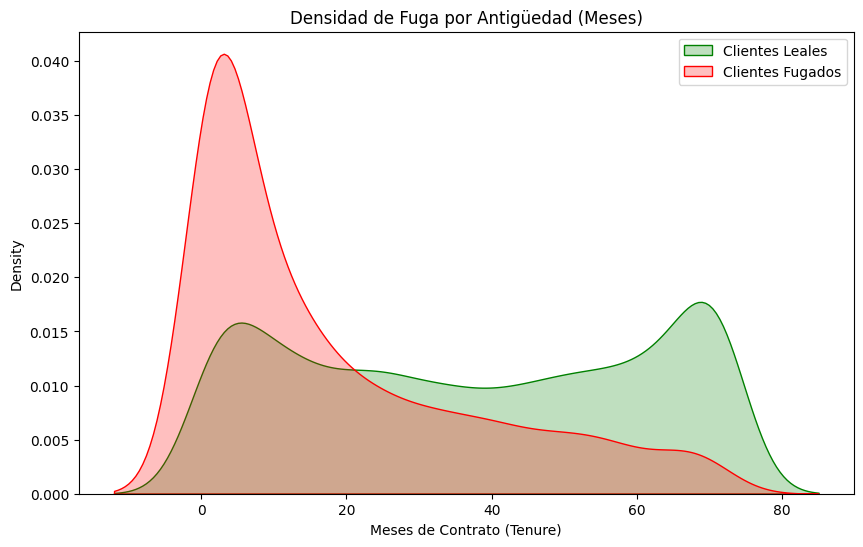

In [48]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['ChurnNum'] == 0]['Tenure'], color='green', shade=True, label='Clientes Leales')
sns.kdeplot(df[df['ChurnNum'] == 1]['Tenure'], color='red', shade=True, label='Clientes Fugados')
plt.title('Densidad de Fuga por Antigüedad (Meses)')
plt.xlabel('Meses de Contrato (Tenure)')
plt.legend()
plt.show()

--- Generando Tablero de Diagnóstico ---


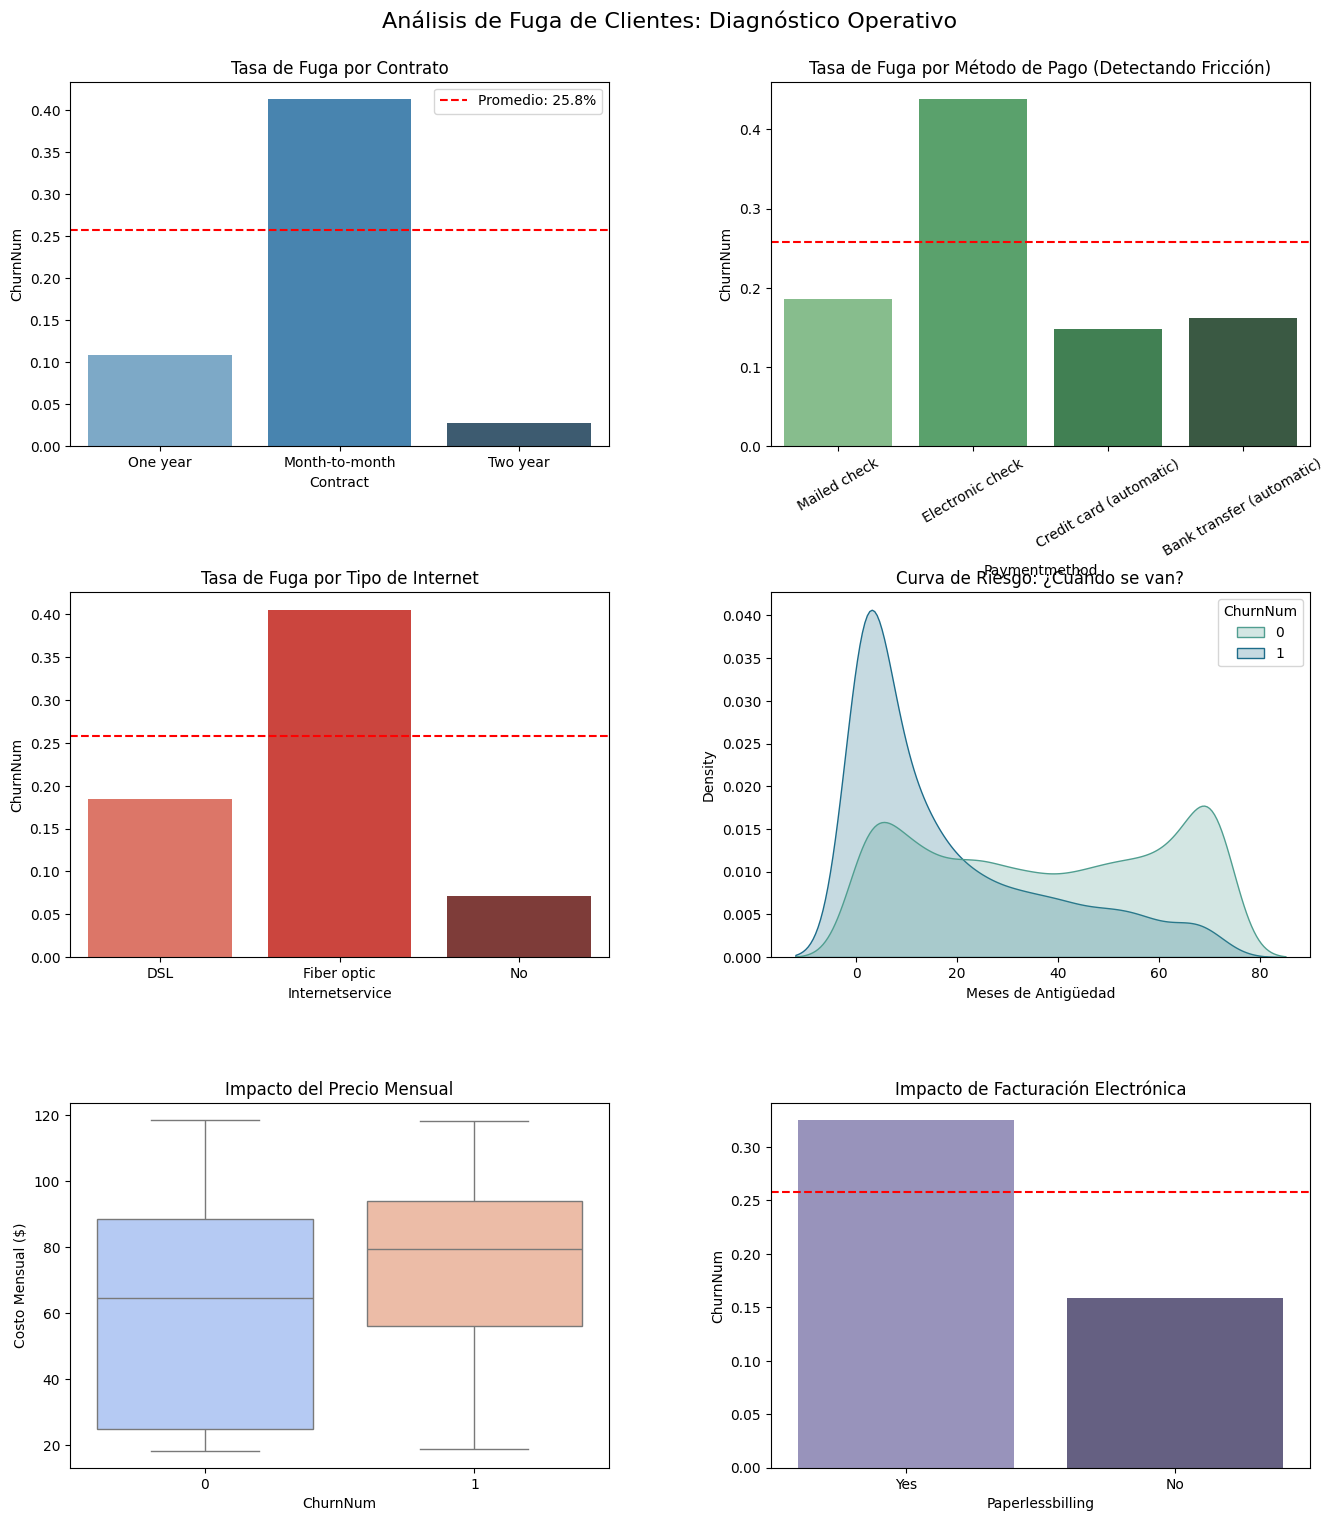

In [51]:
print("--- Generando Tablero de Diagnóstico ---")

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
fig.suptitle('Análisis de Fuga de Clientes: Diagnóstico Operativo', fontsize=16, y=0.92)

# Tasa promedio para línea de referencia
avg_churn = df['ChurnNum'].mean()

# G1: Contrato (Compromiso)
sns.barplot(x='Contract', y='ChurnNum', data=df, ax=axes[0, 0], palette='Blues_d', errorbar=None)
axes[0, 0].set_title('Tasa de Fuga por Contrato')
axes[0, 0].axhline(avg_churn, color='r', linestyle='--', label=f'Promedio: {avg_churn:.1%}')
axes[0, 0].legend()

# G2: Método de Pago (Fricción)
sns.barplot(x='Paymentmethod', y='ChurnNum', data=df, ax=axes[0, 1], palette='Greens_d', errorbar=None)
axes[0, 1].set_title('Tasa de Fuga por Método de Pago (Detectando Fricción)')
axes[0, 1].tick_params(axis='x', rotation=30)
axes[0, 1].axhline(avg_churn, color='r', linestyle='--')

# G3: Internet (Producto)
sns.barplot(x='Internetservice', y='ChurnNum', data=df, ax=axes[1, 0], palette='Reds_d', errorbar=None)
axes[1, 0].set_title('Tasa de Fuga por Tipo de Internet')
axes[1, 0].axhline(avg_churn, color='r', linestyle='--')

# G4: Antigüedad (Ciclo de Vida)
sns.kdeplot(data=df, x='Tenure', hue='ChurnNum', fill=True, ax=axes[1, 1], palette='crest', common_norm=False)
axes[1, 1].set_title('Curva de Riesgo: ¿Cuándo se van?')
axes[1, 1].set_xlabel('Meses de Antigüedad')

# G5: Sensibilidad al Precio
sns.boxplot(x='ChurnNum', y='Monthly', data=df, ax=axes[2, 0], palette='coolwarm')
axes[2, 0].set_title('Impacto del Precio Mensual')
axes[2, 0].set_ylabel('Costo Mensual ($)')

# G6: Facturación Digital
sns.barplot(x='Paperlessbilling', y='ChurnNum', data=df, ax=axes[2, 1], palette='Purples_d', errorbar=None)
axes[2, 1].set_title('Impacto de Facturación Electrónica')
axes[2, 1].axhline(avg_churn, color='r', linestyle='--')

plt.show()

--- Generando Matriz de Interacción (Causa Raíz) ---


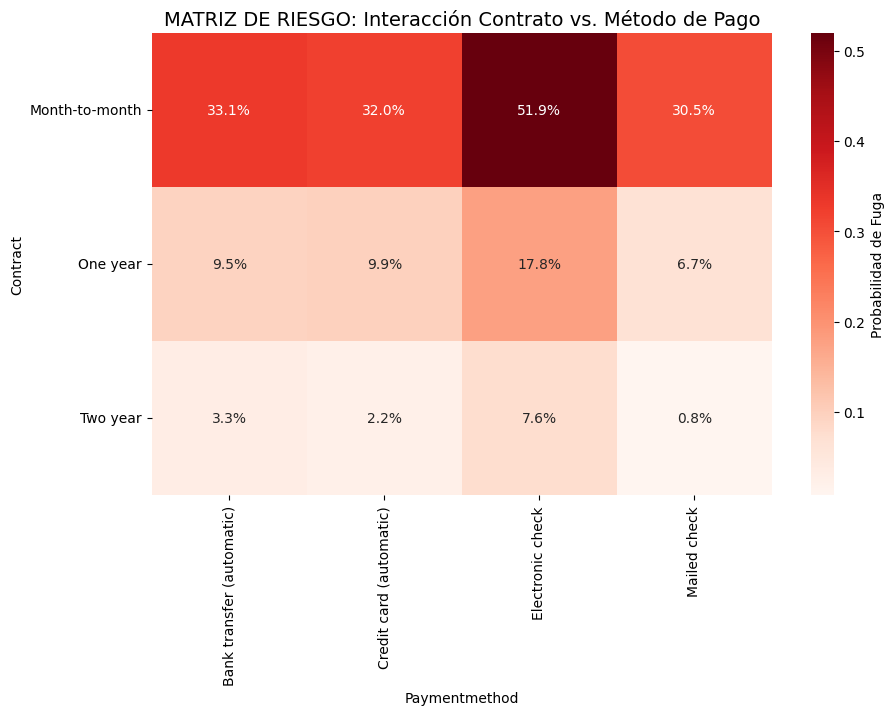

In [53]:
# ==========================================
# 3. LA "MATRIZ DE LA MUERTE" (HEATMAP)
# ==========================================
print("--- Generando Matriz de Interacción (Causa Raíz) ---")

# Tabla pivote: Contrato vs Método de Pago
pivot_risk = df.pivot_table(index='Contract', columns='Paymentmethod', values='ChurnNum', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_risk, annot=True, fmt=".1%", cmap="Reds", cbar_kws={'label': 'Probabilidad de Fuga'})
plt.title('MATRIZ DE RIESGO: Interacción Contrato vs. Método de Pago', fontsize=14)
plt.yticks(rotation=0)
plt.show()

In [61]:
# ==========================================
# 5. RESULTADOS EN TEXTO
# ==========================================
print("\n" + "="*40)
print("RESUMEN EJECUTIVO PARA EL INFORME")
print("="*40)
print(f"Tasa Global de Fuga: {avg_churn:.2%}")
print("La 'Zona de Muerte' Operativa (Mayor Fuga Detectada):")
max_risk = pivot_risk.max().max()
print(f"   Clientes con Contrato Mensual + Cheque Electrónico: {max_risk:.2%} de probabilidad de fuga.")
print("="*40)


RESUMEN EJECUTIVO PARA EL INFORME
Tasa Global de Fuga: 25.76%
La 'Zona de Muerte' Operativa (Mayor Fuga Detectada):
   Clientes con Contrato Mensual + Cheque Electrónico: 51.91% de probabilidad de fuga.


#📄Informe final

## 1. Introducción
**Objetivo del Análisis:** Determinar las causas raíz del abandono de clientes en la compañía de telecomunicaciones y proponer estrategias basadas en datos para reducir la tasa de fuga actual del **25.76%.**

**El Problema:** La compañía enfrenta un reto de retención significativo. Identificar "quién" se va no es suficiente; el objetivo de este estudio fue diagnosticar "por qué" se van, aislando factores operativos, financieros y de servicio que están friccionando la experiencia del cliente.

## 2. Limpieza y Tratamiento de Datos
Se procesó un dataset de 7,267 registros (*TelecomX_Data.json*). El flujo de trabajo de Ingeniería de Datos consistió en:

1. **Ingesta y Aplanado:** Transformación de la estructura JSON anidada a formato tabular plano.

2. **Conversión de Tipos:** La columna `Totalcharges` presentaba valores nulos ocultos (espacios vacíos), los cuales fueron depurados para permitir el cálculo financiero.

3. **Codificación:** Transformación de variables categóricas (Texto) a numéricas para el modelado de Machine Learning.

4. **Generación de KPIs:** Creación de variables binarias para el cálculo preciso de tasas de abandono.

## 3. Análisis Exploratorio y Evidencia (Tablas Fundamentales)

### 3.1. Panorama General de Fuga
La situación actual muestra que **1 de cada 4 clientes** abandona la compañía.

**Tabla 1: Métricas Globales de Fuga**
| Métrica | Valor Absoluto | Porcentaje / Tasa |
| :--- | :--- | :--- |
| Total Clientes Analizados | 7,256 | 100% |
| Clientes Retenidos | 5,387 | 74.24% |
| Clientes Perdidos (Churn) | 1,869 | 25.76% |

### 3.2. El Factor Contractual
El tipo de contrato es el predictor más fuerte de lealtad. La fuga se concentra masivamente en los clientes sin compromiso a largo plazo.

**Tabla 2: Riesgo por Tipo de Contrato**
| Tipo de Contrato | Total Clientes | Clientes Fugados | Tasa de Fuga (%) | Riesgo Relativo |
| :--- | :---: | :---: | :---: | :--- |
| Month-to-month (Mes a mes) | 4,005 | 1,655 | 41.32% | **Crítico** |
| One year (Un año) | 1,518 | 166 | 10.94% | Medio |
| Two year (Dos años) | 1,733 | 48 | 2.77% | Bajo |

### 3.3. El Factor Financiero (Precio y Pago)
El análisis financiero revela que los clientes que se van pagan considerablemente más que los que se quedan, y utilizan métodos de pago con mayor fricción operativa.

**Tabla 3: Impacto del Precio Mensual (Monthly Charges)**
| Estado del Cliente | Ticket Promedio Mensual | Antigüedad Promedio |
| --- | --- | --- |
| Clientes Leales (No Churn) | 61.31 USD | 37.6 meses |
| Clientes Fugados (Churn) | 74.44 USD | 17.9 meses |
| Diferencia | +13.13 USD (+21%) | **-19.7 meses** |

**Tabla 4: Fuga por Método de Pago**
| Método de Pago | Tasa de Fuga (%) | Observación |
| :--- | :---: | :--- |
| Electronic check | 43.80% | **Zona Roja Operativa** |
| Mailed check | 18.59% | Riesgo Moderado |
| Bank transfer (auto) | 16.26% | Riesgo Bajo |
| Credit card (auto) | 14.81% | Riesgo Bajo |




## 4. Conclusiones e Insights (Diagnóstico Causal)
Utilizando un algoritmo de **Random Forest** para determinar la importancia de variables y matrices de correlación, llegamos a las siguientes conclusiones definitivas:

* **El Bolsillo es el detonante principal:** Las variables financieras (`TotalCharges` y `MonthlyCharges`) ocupan el Top 1 y Top 2 en importancia predictiva. Los clientes se van porque sienten que el costo supera al valor recibido, especialmente cuando su factura supera los **$70 USD**.
* **La "Trampa Operativa" del Cheque Electrónico:** Un cliente que paga con *Electronic Check* tiene una probabilidad de fuga casi triple que uno con tarjeta de crédito.
* **La Matriz de la Muerte (Hallazgo Clave):** Al cruzar Contrato vs. Pago, encontramos el segmento más tóxico del negocio:

**Tabla 5: Matriz de Calor de Probabilidad de Fuga**
| Contrato / Pago | Transferencia Auto | Tarjeta Crédito Auto | Electronic Check |
| :--- | :---: | :---: | :---: |
| **Mes a Mes** | 33.1% | 32.0% | **51.9% (PELIGRO)** |
| **Un Año** | 9.5% | 9.9% | 17.8% |

> **Insight:** Más de la mitad (51.9%) de los usuarios que están en contrato mensual y pagan con cheque electrónico abandonan la empresa.


## 5. Recomendaciones Estratégicas

1. **Campaña "Cero Fricción" de Pagos:**
    * **Acción:** Migrar agresivamente a los usuarios de *Electronic Check* hacia pagos automáticos.
    * **Incentivo:** Ofrecer un descuento único de $5 USD por inscribir su tarjeta.
2. **Reestructuración de Precios para Nuevos Usuarios:**
    * **Acción:** Crear un "Starter Pack" con precio reducido los primeros 6 meses para aumentar la antigüedad promedio.
3. **Blindaje Contractual:**
    * **Acción:** Eliminar o desincentivar la venta de servicios de alto valor bajo la modalidad *Month-to-month*.
    * **Táctica:** Hacer que el contrato anual incluya beneficios tangibles como instalación gratis.